# Coin Flip Probabiltiy Simulation

## 🎯 Goal
This is a probability & simulation mini project.
I will:

Simulate coin flips

Collect the outcomes in a dataset

Analyze the results

Visualize the distribution to see if it matches what probability theory predicts

### Probability of a coin flip

A fair coin has a 50% chance to be heads, and 50% chance to be tails.

Therefore, in theory the distribution between heads and tails should be equal.

### 📌 Step 1: Define the experiment
Toss a fair coin (50% chance heads, 50% tails)

Do it n times — say, 100, 1,000, or 10,000 tosses

Import Numpy to simulate random coinflips

Import pandas to create a dataframe of coinflips

Import matplotlib and seaborn to graph distribution

#### Please feel free to change n_tosses value and see for yourself how the distribution changes!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
n_tosses = 10000

#0 = heads, 1 = tails
tosses = np.random.choice(['Heads', 'Tails'], size=n_tosses)


In [41]:
#create df to store results
df = pd.DataFrame(tosses, columns=['Result'])
counts = df['Result'].value_counts()
print(counts)

Result
Tails    50137
Heads    49863
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Coin Flip Results n=10000')

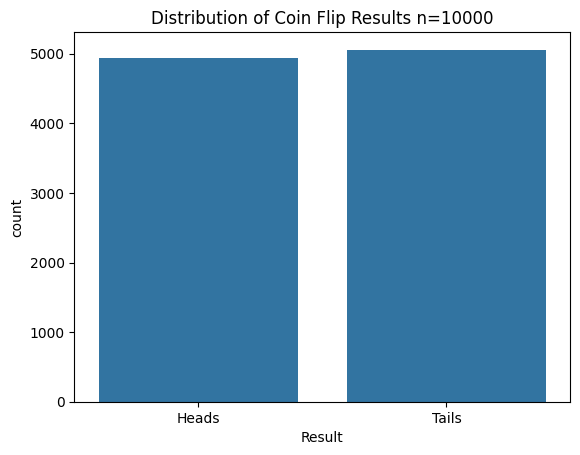

In [25]:
sns.countplot(data=df, x='Result')
plt.title(f'Distribution of Coin Flip Results n={n_tosses}')

## Insight

### 📌 Why Does the Coin Toss Get Closer to 50/50 with More Tosses?

In theory, a fair coin has a **50% chance of landing on Heads** and a **50% chance of landing on Tails**.  
However, in small samples, random chance can easily create an imbalance.  
For example, if you flip a coin only 10 times, you might get 7 Heads and 3 Tails.

This is where the **Law of Large Numbers** comes in.  
The Law of Large Numbers says that as the number of trials (**n**) increases, the *observed* proportions will get closer to the *expected* probability.  
So, if you flip a coin 1,000 or 10,000 times, the proportion of Heads and Tails will naturally stabilize around 50/50.

This experiment shows how larger sample sizes reduce random variation and give results that better reflect the true underlying probability.

**Key takeaway:** Small samples can be misleading, but large samples reveal the real pattern.

To show this, I will plot the proportion of heads to tails as 'n' increases.

## 📌 Step 2

Create a table of proportions of head vs tail % at different n values.

Use seaborn to show how the distribution of heads and tails gets close to 50/50 at large n values


In [46]:
# Define the  sample sizes to test
n_values = [10, 100, 1000, 10000, 100000]

# Store results in a list of dicts
results = []

for n in n_values:
    tosses = np.random.choice(['Heads', 'Tails'], size=n)
    counts = pd.Series(tosses).value_counts(normalize=True) * 100  # Get % directly
    heads_pct = counts.get('Heads', 0)
    tails_pct = counts.get('Tails', 0)

    results.append({'n': n, 'Head%': heads_pct, 'Tail%': tails_pct})

# Turn the list of dicts into a DataFrame
proportion_df = pd.DataFrame(results)

print(proportion_df)



        n   Head%   Tail%
0      10  40.000  60.000
1     100  50.000  50.000
2    1000  52.300  47.700
3   10000  49.980  50.020
4  100000  50.058  49.942


In [47]:
#melt outcomes together into one column, and the value will be the column next to it

proportion_df_melted = proportion_df.melt(
    id_vars='n',                # Keep 'n' as ID
    value_vars=['Head%', 'Tail%'],  # The columns to unpivot
    var_name='Outcome',         # New column name for variable
    value_name='Percent'        # New column for values
)

proportion_df_melted

,n,Outcome,Percent
0,10,Head%,40.000
1,100,Head%,50.000
2,1000,Head%,52.300
3,10000,Head%,49.980
4,100000,Head%,50.058
5,10,Tail%,60.000
6,100,Tail%,50.000
7,1000,Tail%,47.700
8,10000,Tail%,50.020
9,100000,Tail%,49.942


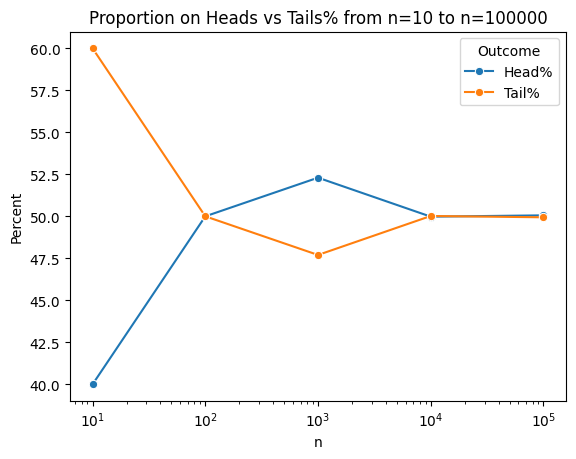

In [49]:
sns.lineplot(
    data=proportion_df_melted,  # long format DataFrame
    x='n',                      # x-axis: number of tosses
    y='Percent',                # y-axis: proportion
    hue='Outcome',              # separate line for each outcome
    marker='o'                  # add markers for each point
)
plt.title("Proportion on Heads vs Tails% from n=10 to n=100000")
plt.xscale('log') #use log scale for x-axis so plot is easier to read

## 📌 Key Takeaways: Coin Toss Proportions as Sample Size Increases

This line plot shows how the **proportion of Heads and Tails** changes as we increase the number of coin tosses (`n`).

At small sample sizes (like 10 or 100 tosses), random chance can create large imbalances — for example, you might see 60% Heads and 40% Tails just by luck. But as the number of tosses grows larger (1,000 → 10,000 and beyond), the proportions get closer and closer to the theoretical probability of **50% Heads, 50% Tails**.

This visual demonstrates the **Law of Large Numbers** in action:  
> *As the number of trials increases, the sample mean (or proportion) converges to the true probability.*

In other words, randomness balances out over time. Small samples are noisy — large samples reveal the true pattern. This is the same principle that underlies much of **inferential statistics** and real-world data analysis.

✅ **Key point:** The more data you have, the more reliable your estimates become.

See my dice rolling simulation also to see how distribution will even out over 6 equally likely outcomes instead of 2.